In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
tic_train = pd.read_csv("train.csv")
tic_test = pd.read_csv("test.csv")

In [3]:
def Filtering_data(data):
    data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    data['Age'] = data['Age'].fillna(data['Age'].median())
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    return data

tic_train = Filtering_data(tic_train)
tic_test = Filtering_data(tic_test)

In [4]:
tic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [5]:
tic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


train이랑 test랑 따로할순없나... 시도...

In [6]:
X = tic_train.drop('Survived', axis=1)
y = tic_train['Survived']

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tic_model = DecisionTreeClassifier(random_state=42)
tic_model.fit(X_train, y_train)

# 검증 데이터로 모델 평가
y_pred = tic_model.predict(X_valid)
print(f'Validation Accuracy: {accuracy_score(y_valid, y_pred)}')

Validation Accuracy: 0.7988826815642458


In [8]:
X_test = tic_test

# 테스트 데이터에 대한 예측
test_predictions = tic_model.predict(X_test)

# 예측 결과를 파일로 저장
submission = pd.DataFrame({'PassengerId': pd.read_csv('test.csv')['PassengerId'],'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)

print(submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         1
3          895         1
4          896         1


그냥 일단 train.csv파일 안에서 해보자..

성별 비율

<AxesSubplot:xlabel='Survived', ylabel='count'>

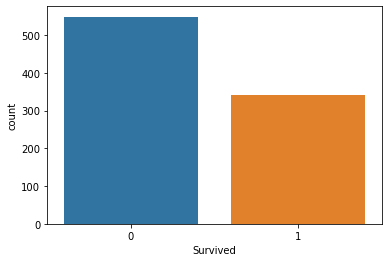

In [9]:
sns.countplot(x='Survived',data=tic_train) 

In [10]:
X = tic_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = tic_train['Survived'].to_numpy()

In [11]:
# 'Sex'와 'Embarked' 컬럼을 수치형으로 변환
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [12]:
# 데이터 분할
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 데이터 스케일링(StandardScaler 사용)
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [14]:
print("X_train_scaled:", X_train_scaled)
print("X_test_scaled:", X_test_scaled)
print("y_train:", y_train)
print("y_test:", y_test)

X_train_scaled: [[-1.61413602  1.25364106 -0.47072241 ... -0.7243102  -0.46146201
  -0.30335547]
 [-0.40055118 -0.47728355 -0.47072241 ... -0.7243102  -0.46146201
  -0.30335547]
 [ 0.81303367  0.21508629 -0.47072241 ... -0.7243102  -0.46146201
  -0.30335547]
 ...
 [ 0.81303367  0.90745614  1.23056874 ... -0.7243102  -0.46146201
  -0.30335547]
 [-1.61413602 -1.1696534   0.37992316 ...  1.38062393 -0.46146201
  -0.30335547]
 [-1.61413602 -0.63114352 -0.47072241 ... -0.7243102  -0.46146201
  -0.30335547]]
X_test_scaled: [[ 0.81303367 -0.09263364  0.37992316 ... -0.7243102   2.16702561
  -0.30335547]
 [-0.40055118  0.13815631 -0.47072241 ... -0.7243102  -0.46146201
  -0.30335547]
 [ 0.81303367 -0.7080735  -0.47072241 ... -0.7243102  -0.46146201
  -0.30335547]
 ...
 [ 0.81303367  0.67666619  0.37992316 ...  1.38062393 -0.46146201
  -0.30335547]
 [-0.40055118 -0.93886345 -0.47072241 ...  1.38062393 -0.46146201
  -0.30335547]
 [ 0.81303367 -1.93895323  0.37992316 ...  1.38062393 -0.46146201
 

#### 결정트리 (Decision Tree)

In [15]:
from sklearn.tree import DecisionTreeClassifier

# 인스턴스 생성
tic_dt = DecisionTreeClassifier(random_state=42)
tic_dt.fit(X_train_scaled, y_train)

print(tic_dt.score(X_train_scaled, y_train))
print(tic_dt.score(X_test_scaled, y_test))

0.9789325842696629
0.776536312849162


- 훈련세트 점수 높
- 테스트 점수 낮음

In [16]:
X_train_scaled

array([[-1.61413602,  1.25364106, -0.47072241, ..., -0.7243102 ,
        -0.46146201, -0.30335547],
       [-0.40055118, -0.47728355, -0.47072241, ..., -0.7243102 ,
        -0.46146201, -0.30335547],
       [ 0.81303367,  0.21508629, -0.47072241, ..., -0.7243102 ,
        -0.46146201, -0.30335547],
       ...,
       [ 0.81303367,  0.90745614,  1.23056874, ..., -0.7243102 ,
        -0.46146201, -0.30335547],
       [-1.61413602, -1.1696534 ,  0.37992316, ...,  1.38062393,
        -0.46146201, -0.30335547],
       [-1.61413602, -0.63114352, -0.47072241, ..., -0.7243102 ,
        -0.46146201, -0.30335547]])

#### 시각화

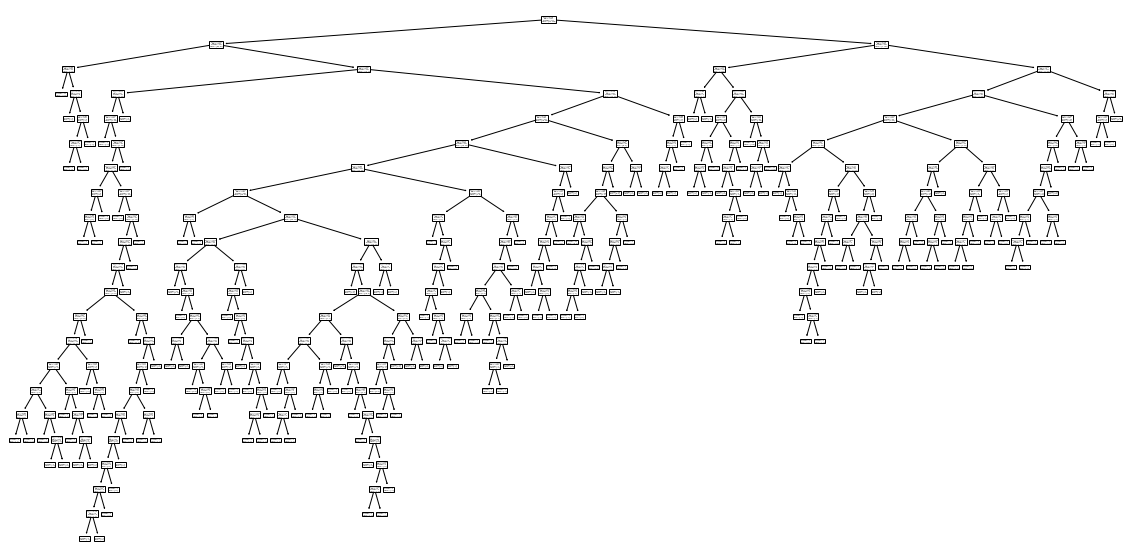

In [17]:
# plot_tree() 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tic_dt)
plt.show()

In [18]:
tic_dt2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tic_dt2.fit(X_train_scaled, y_train)

print(tic_dt2.score(X_train_scaled, y_train))
print(tic_dt2.score(X_test_scaled, y_test))

0.8342696629213483
0.7988826815642458


In [19]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_1', 'Embarked_1.0',
       'Embarked_2.0'],
      dtype='object')

In [20]:
# 특성 중요도 확인 
# ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 
# 'Embarked_Q', 'Embarked_S']
tic_dt2.feature_importances_

array([0.20953604, 0.07535261, 0.04813481, 0.        , 0.06123978,
       0.60573676, 0.        , 0.        ])

중요도 순위

Sex_male > Pclass > Age > Fare > SibSp

0.8342696629213483
0.7988826815642458
['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Sex_1' 'Embarked_1.0'
 'Embarked_2.0']
[0.20953604 0.07535261 0.04813481 0.         0.06123978 0.60573676
 0.         0.        ]


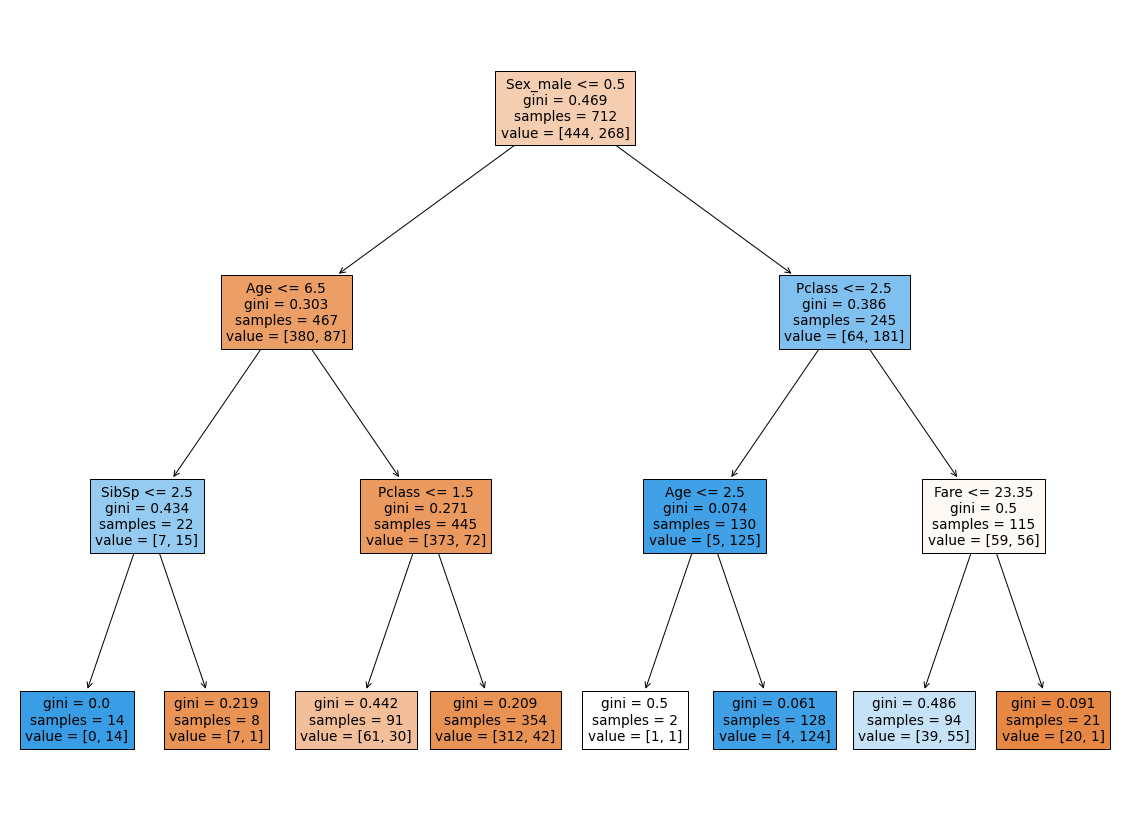

In [21]:
from sklearn.tree import DecisionTreeClassifier

tic_dt2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tic_dt2.fit(X_train, y_train)

print(tic_dt2.score(X_train, y_train))
print(tic_dt2.score(X_test, y_test))
print(tic_dt2.feature_names_in_)
print(tic_dt2.feature_importances_)

# 그래프로 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(tic_dt2, filled=True, feature_names= \
          ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 
           'Embarked_Q','Embarked_S'])
plt.show()

In [22]:
sum(tic_dt2.feature_importances_) # 특성 중요도를 모두 더하면 1

1.0

min_impurity_decrease 파라미터 사용 가지치기 (최소 불순도 지정)

max_depth 설정

0.8581460674157303
0.8044692737430168


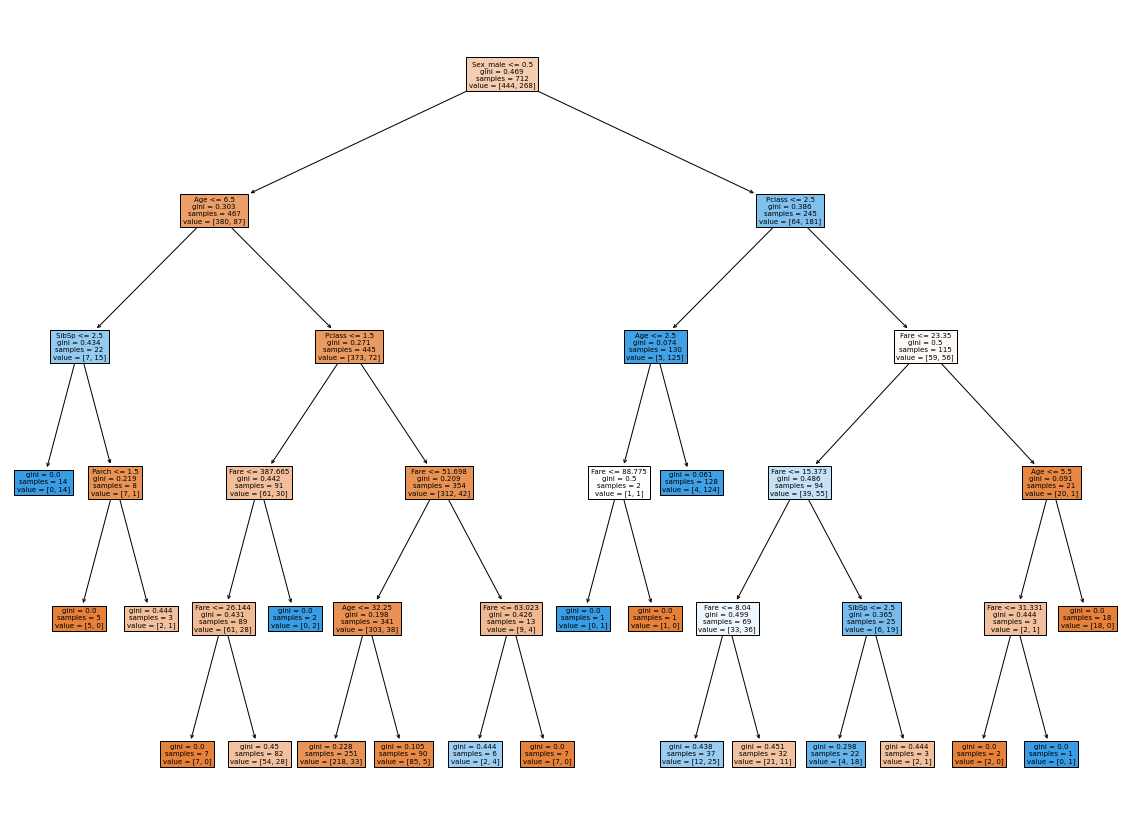

In [23]:
from sklearn.tree import DecisionTreeClassifier

tic_dt2 = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0005, random_state=42)
tic_dt2.fit(X_train, y_train)

print(tic_dt2.score(X_train, y_train))
print(tic_dt2.score(X_test, y_test))

# 그래프로 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(tic_dt2, filled=True, feature_names= \
          ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 
           'Embarked_Q','Embarked_S'])
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.2f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.2f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.2f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.79
RandomForestClassifier 정확도:0.79
LogisticRegression 정확도: 0.80


#### 평가지표 확인
- 혼동행렬
- F1-score
- ROC/AUC

In [25]:
tic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


#### 예시파일 보고 연습

In [26]:
most_freq = tic_train['Embarked'].value_counts(dropna=True).idxmax()   
tic_train['Embarked'].fillna(most_freq, inplace=True)

In [27]:
tic_train.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [28]:
ndf = tic_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
ndf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0.0
1,1,1,1,38.0,1,0,1.0
2,1,3,1,26.0,0,0,0.0
3,1,1,1,35.0,1,0,0.0
4,0,3,0,35.0,0,0,0.0


In [29]:
# 속성(변수) 선택
X=ndf[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]  #독립 변수 X
y=ndf['Survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (623, 6)
test data 개수:  (268, 6)


In [30]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

print('예측:', y_hat[:30])
print('실제:', y_test.values[:30])

예측: [0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1]
실제: [0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1]


In [31]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(len(X_test))
print(knn_matrix)

268
[[152  22]
 [ 26  68]]


In [32]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_hat).ravel()
print(TN, FP, FN, TP)

152 22 26 68


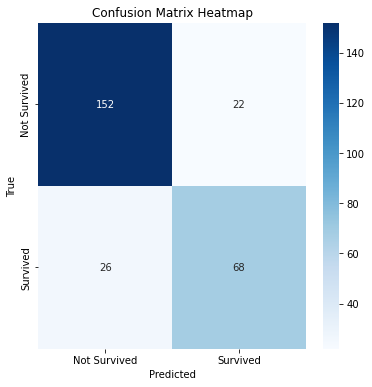

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 테스트 데이터로 모델의 예측값을 얻음
y_pred = knn.predict(X_test)

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스 레이블 설정 (0: 생존하지 않은 경우, 1: 생존한 경우)
class_labels = ['Not Survived', 'Survived']

# 히트맵 그리기
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [34]:
# 전체 예측(양성, 음성)에서 정답을 잘 맞춘 것
accuracy = (TP+TN) / (TN+FP+FN+TP)
print('정확도(accuracy):', accuracy)

# "양성으로 예측"한 것 중 "실제 양성"인 것
precision = TP / (TP + FP)
print('정밀도(precision):', precision) 

# "실제 음성"인데 "예측을 음성"이라고 한 것
specificity = TN / (TN+FP)
print('특이도(Specificity):', specificity) 

# "실제 양성"인데 "예측을 양성"이라고 한 것
sensitivity = TP / (TP+FN)
print('민감도(재현율, Recall, Sensitivity):', sensitivity)

# "음성으로 예측"한 것들 중 "실제 음성"인 것
NPV = TN / (TN+FN)
print('음성 예측 가치(NPV):', NPV)

# "실제 양성" 중에서 "예측을 음성"으로 분류한 비율
FNR = FN / (FN+TP)
print('FNR:', FNR)

# "실제 양성" 중에서 "예측을 양성"으로 분류한 비율
TPR = TP / (TP+FN)
print('TPR:', TPR)
# "실제 음성" 중에서 "예측을 양성"으로 분류한 비율
FPR = FP / (TN+FP)
print('FPR:', FPR)

# 조화 평균(정밀도와 민감도를 이용한 점수)
f1_score = 2 * ((precision*sensitivity) / (precision+sensitivity))
print('f1-score(조화평균):', f1_score)

# test data의 예측 확률을 얻음
y_prob = knn.predict_proba(X_test)[:, 1]  # 클래스 1 (생존)에 대한 예측 확률
print('1에 대한 예측 확률:', y_prob[:15])

정확도(accuracy): 0.8208955223880597
정밀도(precision): 0.7555555555555555
특이도(Specificity): 0.8735632183908046
민감도(재현율, Recall, Sensitivity): 0.723404255319149
음성 예측 가치(NPV): 0.8539325842696629
FNR: 0.2765957446808511
TPR: 0.723404255319149
FPR: 0.12643678160919541
f1-score(조화평균): 0.7391304347826088
1에 대한 예측 확률: [0.  0.  0.4 1.  1.  0.  0.  0.  0.2 0.  0.  0.8 0.6 0.4 0. ]


In [35]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       174
           1       0.76      0.72      0.74        94

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [36]:
knn.score(X_test, y_test)

0.8208955223880597

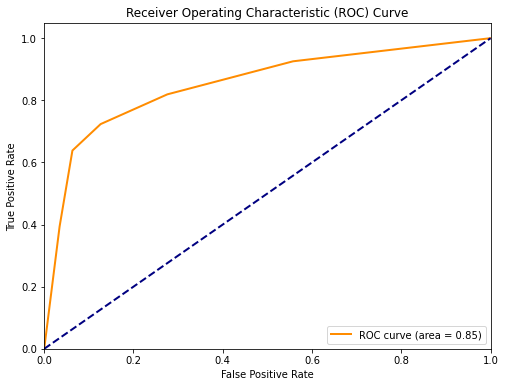

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# test data의 예측 확률을 얻음
y_prob = knn.predict_proba(X_test)[:, 1]  # 클래스 1 (생존)에 대한 예측 확률

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()